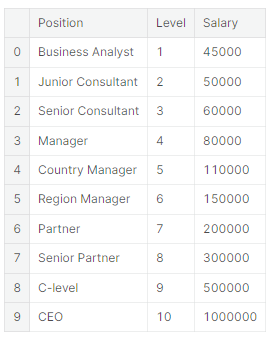

The above image contains data about the salary information of a corporate company. The salary is directly related to the level of an employee. So you will need to learn the salary as a polynomial function of the level. If the level is $x$, then the salary should be $f(x)$.


1.   At first, you are given that the degree of the polynomial is $2$. So, $f(x) = ax^2 + bx + c$. Express the following data as a matrix equation of the form: $Ax = b$. From this, find the least square solution using the formula: $x = (A^T A)^{-1} A^T b$.

2.   Now, find the same solution. But this time, using gradient descent. Since, our hyothesis function is $f(x) = ax^{2} + bx + c$ for some unknown $a, b, c \in \mathbb{R}$. So, the error function will be as follows:

> > $E = \frac{1}{m}\sum_{i = 1}^{m} (y_{i} - f(x_{i}))^{2} = \frac{1}{m}\sum_{i = 1}^{m} (y_{i} - ax_{i}^{2} - bx_{i} - c)^{2}$


> > *   Take random initial values for $a, b, c$. It's good to take $(a, b, c) = (0, 0, 0)$
> > *   In each iteration of the algorithm update the values of $a, b, c$ as follows:


> > $a = a - \lambda \frac{dE}{da} = a - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-\frac{df(x_{i})}{da}) = a - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-x_{i}^{2})$

> > $b = b - \lambda \frac{dE}{db} = b - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-\frac{df(x_{i})}{db}) = b - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-x_{i})$

> > $c = c - \lambda \frac{dE}{dc} = c - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-\frac{df(x_{i})}{dc}) = b - \lambda \frac{1}{m}\sum_{i = 1}^{m} 2(y_{i} - f(x_{i})) (-1)$

> > *   The learing rate is $\lambda = 0.0001$.
> > *   Run 1000000 iterations.
> > *   Compare the values of $a, b, c$ with those found from the least square solution.












In [ ]:
####TASK-1##############
import numpy as np
import math

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
x_2 = []

for i in x:
    x_2.append(i**2)
x = np.array(x)
x_2 = np.array(x_2)
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000])


ones = np.array([1,1,1,1,1,1,1,1,1,1])

mat = np.matrix([x_2,x,ones])
print(mat)

matTr = mat.transpose()

print(matTr)



mul = np.matmul(mat,matTr)
print(mul)

inv = np.linalg.inv(mul)
print(inv)

#mul2 = np.matmul(matTr,y)
sol = (np.matmul(matTr,inv))
sol = np.matmul(y,sol)

print(sol)

[[  1   4   9  16  25  36  49  64  81 100]
 [  1   2   3   4   5   6   7   8   9  10]
 [  1   1   1   1   1   1   1   1   1   1]]
[[  1   1   1]
 [  4   2   1]
 [  9   3   1]
 [ 16   4   1]
 [ 25   5   1]
 [ 36   6   1]
 [ 49   7   1]
 [ 64   8   1]
 [ 81   9   1]
 [100  10   1]]
[[25333  3025   385]
 [ 3025   385    55]
 [  385    55    10]]
[[ 0.00189394 -0.02083333  0.04166667]
 [-0.02083333  0.24128788 -0.525     ]
 [ 0.04166667 -0.525       1.38333333]]
[[  19431.81818182 -132871.21212121  232166.66666667]]


In [ ]:
A = np.linalg.lstsq(matTr,y)
print(A)

(array([  19431.81818182, -132871.21212121,  232166.66666667]), array([6.75883333e+10]), 3, array([160.31354478,   5.19019966,   0.79321269]))


<ipython-input-3-b7687c9b7a68>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A = np.linalg.lstsq(matTr,y)


In [ ]:
##########TASK-2##########
lrt = 0.0001
iter = 1000000
m = (1/10)
a,b,c = 0,0,0
x = [1,2,3,4,5,6,7,8,9,10]
y = [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]

In [ ]:
# #eq = (a*(x**2))+ (b*x) + c
# for i in range(10000):
#     asum = 0
#     bsum = 0
#     csum = 0

#     for j in range(10):
#         asum += 2*((y[j] - a*x[j]**2- b*x[j] - c) *m)* (x[j]**2)
#         #print(asum)
#     new_a  lrt*asum
#     for j in range(10):
#         bsum += 2*((y[j] - a*x[j]**2- b*x[j] - c) *m)* (x[j])
#         #print(asum)
#     new_b += lrt*bsum
#     for j in range(10):
#         csum += 2*((y[j] - a*x[j]**2- b*x[j] - c) *m)* (1)
#         #print(asum)
#     new_c += lrt*csum
#     a = new_a
#     b = new_b
#     c = new_c

   
# print(a,b,c)

In [ ]:
for i in range(iter):
    asum = 0
    bsum = 0
    csum = 0
    for j in range(10):
        asum += lrt* m * 2* (y[j] - a*(x[j]**2) - b*x[j] - c) * (-x[j]**2)
    new_a = a - asum
    for j in range(10):
        bsum += lrt* m * 2* (y[j] - a*(x[j]**2) - b*x[j] - c) * (-x[j])
    new_b = b - bsum
    for j in range(10):
        csum += lrt* m * 2* (y[j] - a*(x[j]**2) - b*x[j] - c) * (-1)
    new_c = c - csum

    a = new_a
    b = new_b
    c = new_c

   
print(a,b,c)

19431.791651795138 -132870.88229548323 232165.82081095624


from least sqr - 19431.81818182 -132871.21212121  232166.66666667]

without last 3 zeros of y - 19.431791651795216 -132.8708822954842 232.16582081095882